<a href="https://colab.research.google.com/github/wilbs43/geometric-algos/blob/master/ps1_p6_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sympy import Point, Polygon, pi, symbols
from sympy.plotting import plot
import matplotlib.pyplot as plt
import random, numpy as np

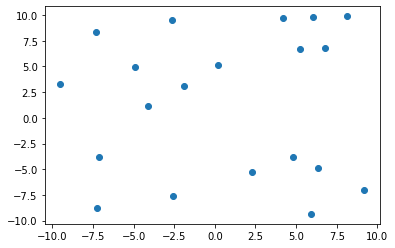

In [0]:

def shortest_dist(pts):
  if(len(pts) == 1):
    return 9999, Point(0,0), Point(0,0)
  x_coords = [pts[i].x for i in range(len(pts))]
  x_coords.sort()
  middle_ind = len(x_coords) // 2
  x_med = x_coords[middle_ind]

  left = []
  right = []
  for pt in pts:
    if pt.x >= x_med:
      right += [pt]
    else: 
      left += [pt]

  dist, pt1, pt2 = shortest_dist(left)
  right_ans, temp1, temp2 = shortest_dist(right)
  if right_ans < dist:
    dist = right_ans
    pt1 = temp1
    pt2 = temp2

  left_candidates = []
  right_candidates = []
  for pt in pts:
    if pt.x > x_med - dist and pt.x < x_med:
      left_candidates += [pt]
    elif pt.x >= x_med and pt.x < x_med + dist:
      right_candidates += [pt]
  left_candidates = sorted(left_candidates, key=lambda k: k.y)
  right_candidates = sorted(right_candidates, key=lambda k: k.y)

  bottom_ind = 0
  top_ind = 0
  for left_pt in left_candidates:
    while right_candidates[top_ind].y < left_pt.y + dist \
        and top_ind < len(right_candidates) - 1:
      top_ind += 1
    while right_candidates[bottom_ind].y < left_pt.y - dist \
        and bottom_ind < len(right_candidates) - 1:
      bottom_ind += 1

    for i in range(bottom_ind,top_ind + 1):
      if left_pt.distance(right_candidates[i]) < dist:
        dist = left_pt.distance(right_candidates[i])
        pt1 = left_pt
        pt2 = right_candidates[i]

  return dist.evalf(), pt1.evalf(), pt2.evalf()



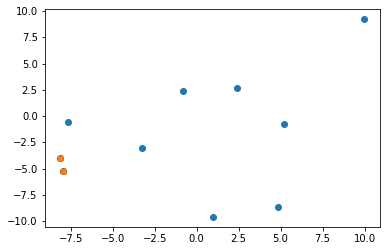

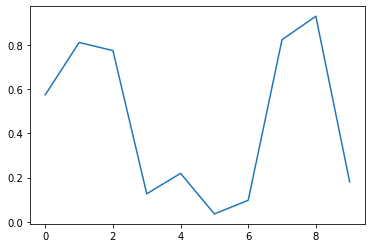

In [80]:
num = 10
point_list = [Point(random.uniform(-10,10),random.uniform(-10,10)) for i in range(num)]
dist, pt1, pt2 = shortest_dist(point_list)
plt.plot([point_list[i].x for i in range(num)], [point_list[i].y for i in range(num)], 'o')
plt.plot([pt1.x,pt2.x],[pt1.y,pt2.y],'X')



fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)